In [1]:
import os



##### Decoding Customer Sentiments: A Comprehensive Analysis of E-commerce Reviews

##### Objective: The objective of the project was to perform sentiment analysis on customer reviews from an e-commerce platform. The goal was to develop machine learning models that could accurately classify reviews as positive, negative, or neutral. The project aimed to provide insights into customer sentiments and enhance decision-making processes for improving products and services.

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
                                              0.0/377.0 MB ? eta -:--:--
                                              0.1/377.0 MB 1.3 MB/s eta 0:04:55
                                              0.2/377.0 MB 2.5 MB/s eta 0:02:33
                                              0.3/377.0 MB 2.5 MB/s eta 0:02:30
                                              0.3/377.0 MB 2.0 MB/s eta 0:03:12
                                              0.4/377.0 MB 1.9 MB/s eta 0:03:18
                                              0.4/377.0 MB 1.9 MB/s eta 0:03:18
                                              0.4/377.0 MB 1.9 MB/s eta 0:03:18
                                              0.4/377.0 MB 1.1 MB/s eta 0:05:31
                                              0.5/377.0 MB 1.2 MB/s eta 0:05:12
                                              0.7/377.0 MB 1.6 MB/s eta 0:04:02
                                              0.8/377.0 MB 

In [3]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential

In [4]:
df = pd.read_csv('Dataset-SA.csv')

In [5]:
df.head()

product_name  product_price  Rate           Review  \
0      Chimney           3999     5           super!   
1      Chimney           3999     5          awesome   
2      Chimney           3999     3             fair   
3      Chimney           3999     1  useless product   
4      Chimney           3999     3             fair   

                                             Summary Sentiment  
0  great cooler excellent air flow and for this p...  positive  
1              best budget 2 fit cooler nice cooling  positive  
2  the quality is good but the power of air is de...  positive  
3                  very bad product its a only a fan  negative  
4                                      ok ok product   neutral

In [6]:
df.shape

(205049, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205049 entries, 0 to 205048
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205049 non-null  object
 1   product_price  205049 non-null  int64 
 2   Rate           205049 non-null  int64 
 3   Review         180385 non-null  object
 4   Summary        205038 non-null  object
 5   Sentiment      205049 non-null  object
dtypes: int64(2), object(4)
memory usage: 9.4+ MB


In [8]:
df.describe()

product_price           Rate
count  205049.000000  205049.000000
mean     4135.165712       4.123307
std      9881.936686       1.306323
min        59.000000       1.000000
25%       319.000000       4.000000
50%       675.000000       5.000000
75%      2999.000000       5.000000
max     86990.000000       5.000000

In [9]:
null_values = df.isnull().sum()

print("Null values in the entire DataFrame:")
print(null_values)

Null values in the entire DataFrame:
product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
null_values = df.isnull().sum()
null_values

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)
df2=df

In [13]:
import string

df['Review'] = df['Review'].apply(lambda x: x.lower())
df['Review'] = df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [14]:
df['Review']

0                   super
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205042           terrific
205043     classy product
205046               nice
205047           just wow
205048      valueformoney
Name: Review, Length: 154464, dtype: object

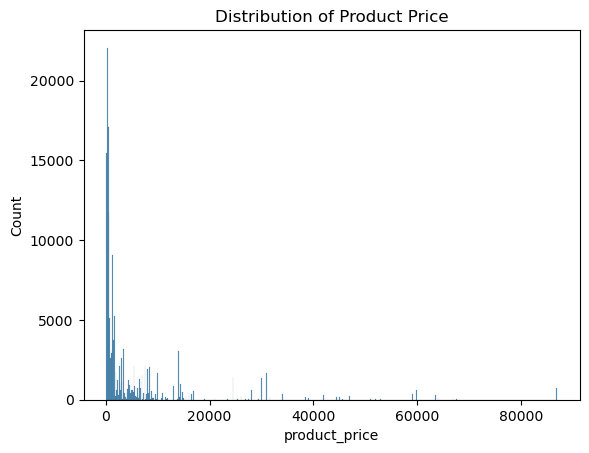

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of numerical variables
sns.histplot(df['product_price'])
plt.title('Distribution of Product Price')
plt.show()

In [16]:
# Count the number of reviews by sentiment
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

positive    122806
negative     23352
neutral       8306
Name: Sentiment, dtype: int64


##### Sentiment Analysis of Reviews
The Rating column of the data contains the ratings given by every reviewer. So let’s have a look at how most of the people rate the products they buy from Flipkart:

In [17]:
ratings = df["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

##### So 60% of the reviewers have given 5 out of 5 ratings to the products.

Let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to visualize the most used words in the reviews column:

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["Review"] = df["Review"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


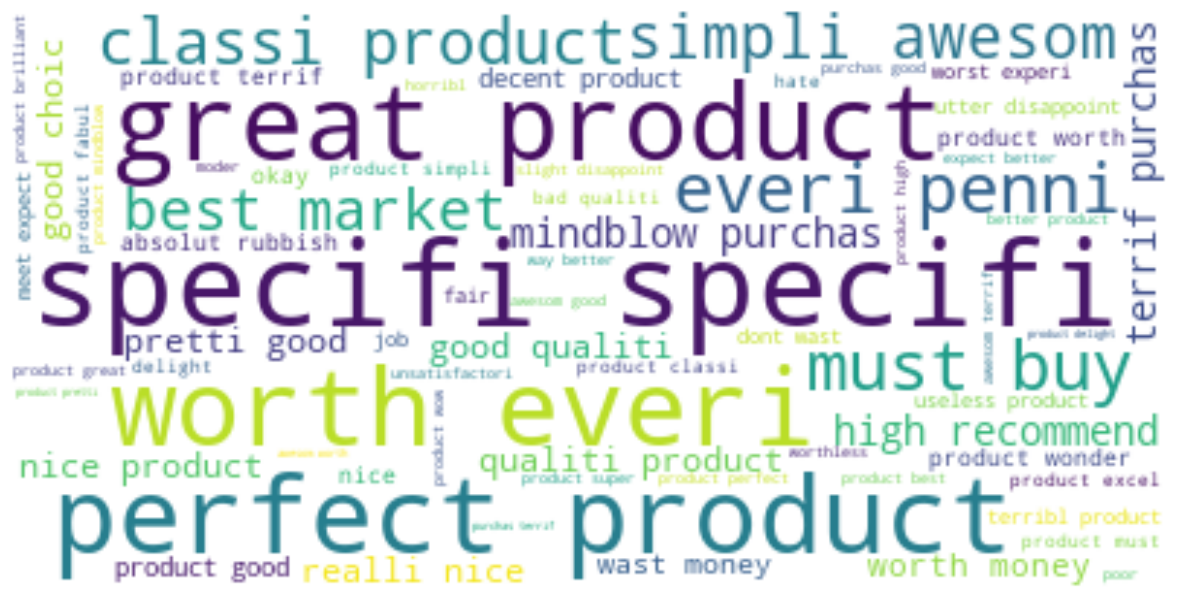

In [19]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

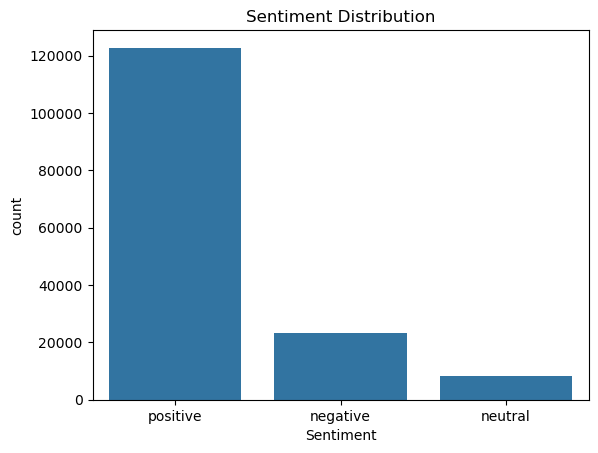

In [20]:
# Visualize the distribution of sentiment
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [21]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
df = df[["Review", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            Review  Positive  Negative  Neutral
0            super       1.0     0.000    0.000
1           awesom       0.0     0.000    1.000
2             fair       1.0     0.000    0.000
3  useless product       0.0     0.737    0.263
4             fair       1.0     0.000    0.000


In [22]:
#data=df
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the reviews are neutral. Let’s have a look at the total of Positive, Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews:

In [23]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  65292.34199997248
Negative:  7446.617999999547
Neutral:  81718.04300001428


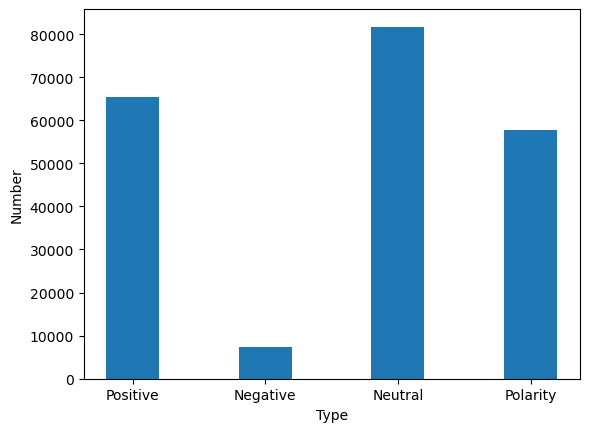

In [24]:
import matplotlib.pyplot as plt
names=['Positive','Negative','Neutral','Polarity']
scores=[x,y,z,x-y]
plt.bar(names,scores,width=.4)
plt.xlabel("Type")
plt.ylabel("Number")
plt.show()



So, most people give Neutral reviews, and a small proportion of people give Negative reviews. So we can say that people are satisfied with Flipkart products and services.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is your DataFrame containing text data
text_data = df['Review']
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()

In [26]:
feature_names

array(['aboveaverag', 'absolut', 'ac', ..., 'yr', 'zero', 'zip'],
      dtype=object)

In [27]:
data_features = vectorizer.transform(df.Review)

In [28]:
data_features

<154464x1036 sparse matrix of type '<class 'numpy.int64'>'
	with 248611 stored elements in Compressed Sparse Row format>

In [29]:
data_features.shape

(154464, 1036)

In [30]:
data_features.getnnz()

248611

In [31]:
density = (data_features.getnnz() * 100) / (data_features.shape[0] * data_features.shape[1])
print("Density of the matrix: ", density)


Density of the matrix:  0.1553578877421326


In [32]:
feature_counts = df['Review'].value_counts()
feature_counts

wonder                               7624
specifi                              5714
good                                 5648
great product                        4816
brilliant                            4807
                                     ... 
item bad use                            1
worst flipkart servic                   1
excel product given price rang          1
excel price                             1
product look nice  strong qualiti       1
Name: Review, Length: 1180, dtype: int64

In [33]:
features = vectorizer.get_feature_names_out()  # Replace with the variable that holds feature names
features_counts = np.sum(data_features.toarray(), axis=0)
features_counts_df = pd.DataFrame({'features': features, 'counts': features_counts})

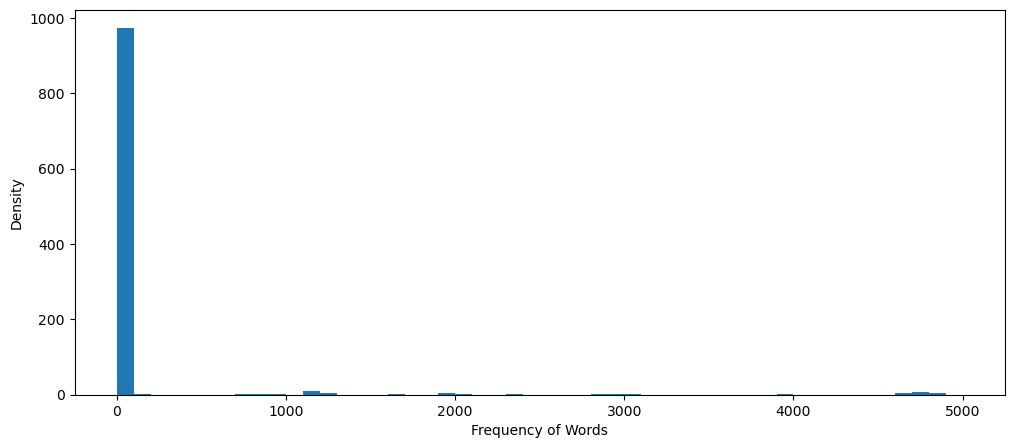

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(features_counts_df['counts'], bins=50, range=(0, 5000))
plt.xlabel('Frequency of Words')
plt.ylabel('Density')
plt.show()

In [35]:
count_of_single_occurrences = len(features_counts_df[features_counts_df['counts'] == 1])
count_of_single_occurrences

576

In [36]:
count_vectorizer = CountVectorizer(max_features=10000)
feature_vector = count_vectorizer.fit_transform(df['Review'])
features = count_vectorizer.get_feature_names_out()
data_features = feature_vector.toarray()
features_counts = np.sum(data_features, axis=0)
feature_counts = pd.DataFrame({'features': features, 'counts': features_counts})


In [37]:
top_features_counts = feature_counts.sort_values('counts', ascending=False).head(15)

In [38]:
top_features_counts

features  counts
716     product   25783
384        good   14842
51       awesom    9558
727     purchas    9311
918      terrif    9260
622        nice    7915
1019      worth    7652
1011     wonder    7640
751   recommend    5777
865     specifi    5714
595       money    5259
392       great    4897
108   brilliant    4813
127         buy    4812
677     perfect    4800

In [39]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df['Review'][0:10]

0              super
1             awesom
2               fair
3    useless product
4               fair
5             awesom
6     high recommend
7               nice
8     unsatisfactori
9        worth money
Name: Review, dtype: object

In [41]:
model=[]
acc=[]

In [42]:
df

Review  Positive  Negative  Neutral
0                 super       1.0     0.000    0.000
1                awesom       0.0     0.000    1.000
2                  fair       1.0     0.000    0.000
3       useless product       0.0     0.737    0.263
4                  fair       1.0     0.000    0.000
...                 ...       ...       ...      ...
205042           terrif       0.0     0.000    1.000
205043   classi product       0.0     0.000    1.000
205046             nice       1.0     0.000    0.000
205047              wow       1.0     0.000    0.000
205048    valueformoney       0.0     0.000    1.000

[154464 rows x 4 columns]

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df2['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model
model = SVC()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)
#model.append(model)
acc.append(accuracy)


Accuracy:  0.8991357265399929
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.75      0.80      4651
     neutral       0.00      0.00      0.00      1701
    positive       0.91      0.99      0.95     24541

    accuracy                           0.90     30893
   macro avg       0.59      0.58      0.58     30893
weighted avg       0.85      0.90      0.87     30893



Accuracy: 0.8991
Precision: The precision for the negative sentiment is 0.85, for the neutral sentiment is 0.0, and for the positive sentiment is 0.91.
Recall: The recall for the negative sentiment is 0.75, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.80, for the neutral sentiment is 0.0, and for the positive sentiment is 0.95.

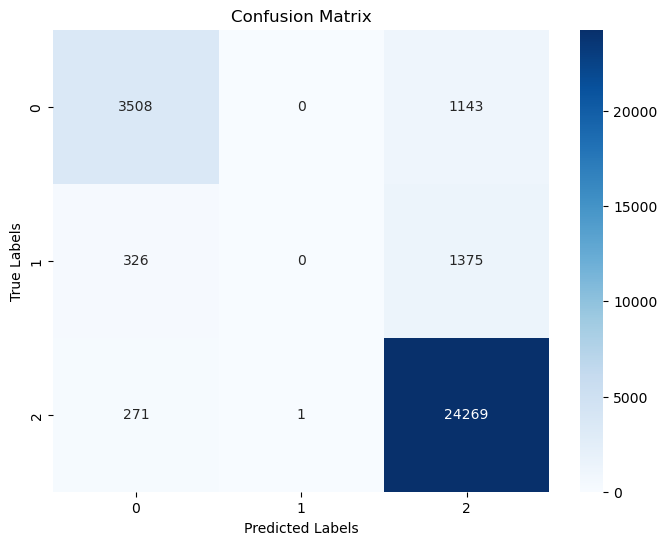

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df2['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


Accuracy:  0.8992004661250121
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.76      0.80      4651
     neutral       0.29      0.00      0.00      1701
    positive       0.91      0.99      0.95     24541

    accuracy                           0.90     30893
   macro avg       0.68      0.58      0.58     30893
weighted avg       0.86      0.90      0.87     30893



Accuracy: 0.8992
Precision: The precision for the negative sentiment is 0.85, for the neutral sentiment is 0.29, and for the positive sentiment is 0.91.
Recall: The recall for the negative sentiment is 0.76, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.80, for the neutral sentiment is 0.0, and for the positive sentiment is 0.95.

In [50]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df2['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


C:\Users\User\Anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy:  0.8992975755025411
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.76      0.80      4651
     neutral       0.40      0.00      0.00      1701
    positive       0.91      0.99      0.95     24541

    accuracy                           0.90     30893
   macro avg       0.72      0.58      0.58     30893
weighted avg       0.87      0.90      0.87     30893



Accuracy: 0.8992
Precision: The precision for the negative sentiment is 0.85, for the neutral sentiment is 0.40, and for the positive sentiment is 0.91.
Recall: The recall for the negative sentiment is 0.76, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.80, for the neutral sentiment is 0.0, and for the positive sentiment is 0.95.

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df2['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Gradient Boosting)
model = GradientBoostingClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


Accuracy:  0.8938270805684135
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.72      0.78      4651
     neutral       1.00      0.00      0.00      1701
    positive       0.90      0.99      0.94     24541

    accuracy                           0.89     30893
   macro avg       0.92      0.57      0.57     30893
weighted avg       0.90      0.89      0.87     30893



Accuracy: 0.8938
Precision: The precision for the negative sentiment is 0.85, for the neutral sentiment is 1.00, and for the positive sentiment is 0.90.
Recall: The recall for the negative sentiment is 0.72, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.78, for the neutral sentiment is 0.0, and for the positive sentiment is 0.94.

In [52]:
import re
from nltk.stem import PorterStemmer
import nltk

stemmer = PorterStemmer()

def get_stemmed_tokens(doc):
    nltk.download('punkt')  # Download the required nltk package 'punkt' for word tokenization
    all_tokens = nltk.word_tokenize(doc)
    clean_tokens = []
    for each_token in all_tokens:
        if re.search('[a-zA-Z]', each_token):
            clean_tokens.append(each_token)
    stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
    return stemmed_tokens

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemmed_words(doc):
    return [stemmer.stem(w) for w in doc.split()]

tfidf_vectorizer = TfidfVectorizer(analyzer=stemmed_words, max_features=10000)
feature_vector = tfidf_vectorizer.fit_transform(df['Review'])
data_features = feature_vector.toarray()
features = tfidf_vectorizer.get_feature_names_out()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df2['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


Accuracy:  0.8993299452950506
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.76      0.80      4651
     neutral       0.25      0.00      0.00      1701
    positive       0.91      0.99      0.95     24541

    accuracy                           0.90     30893
   macro avg       0.67      0.58      0.58     30893
weighted avg       0.86      0.90      0.87     30893



Accuracy: 0.8993
Precision: The precision for the negative sentiment is 0.85, for the neutral sentiment is 0.25, and for the positive sentiment is 0.91.
Recall: The recall for the negative sentiment is 0.76, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.80, for the neutral sentiment is 0.0, and for the positive sentiment is 0.95.

These results indicate the performance of each model on sentiment classification. The accuracy values are consistent across all the classifiers. However, it is important to note that the models performed poorly in predicting the neutral sentiment, achieving an F1-score of 0.0 for this class. This suggests that the models might struggle to accurately classify neutral sentiments.

Further analysis and experimentation may be required to improve the performance of the models on the neutral sentiment class. Additionally, considering other evaluation metrics and exploring alternative approaches could provide deeper insights into the models' effectiveness for sentiment analysis

## Conclusions: The sentiment analysis project aimed to classify customer reviews into positive, negative, and neutral sentiments. Using various classifiers such as SVC, Random Forest, Logistic Regression, and Gradient Boosting, the models achieved an accuracy of approximately 90%. However, the models struggled to accurately predict neutral sentiments. Further improvements and analysis are recommended.